# Appliquons quelques filtres simples

In [2]:
# settings for display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# turn off matplotlib figure axes, else we need to call axes('off') everytime
import matplotlib as mpl
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
plt.set_cmap('gray') 
mpl.rc('axes.spines',top=False,bottom=False,left=False,right=False)
mpl.rc(('xtick','ytick'),color=(1,1,1,0))
mpl.rc('font', size=14)

# import necessarry libs
from imageio import imread
import numpy as np
from scipy.signal import convolve2d as conv2
from skimage.color import rgb2gray
from skimage.transform import resize

import warnings
warnings.filterwarnings("ignore")

In [3]:
img = imread('zebre.jpg')/255.0

# commençons simplement... 
f = np.asarray([[0.0, 0, 0], [0, 1, 0], [0, 0, 0]]).astype(float)
img1 = conv2(img, f, 'same')

<IPython.core.display.Javascript object>


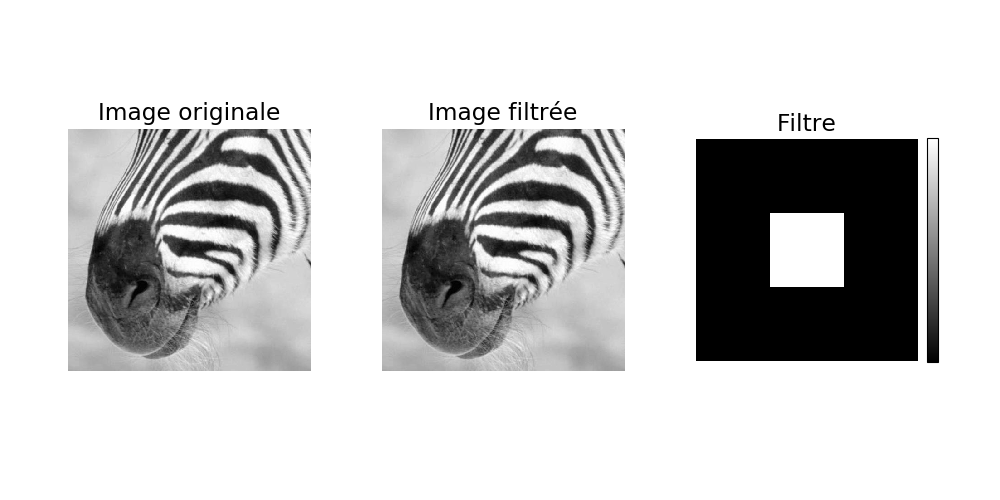

In [4]:
# Affichons l'image, l'image filtrée, et le filtre
%matplotlib notebook
fig = plt.figure(figsize=(10,5), num='Image filtrée')

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img); ax1.set_title('Image originale')
ax2 = fig.add_subplot(1, 3, 2, sharex = ax1, sharey = ax1)
ax2.imshow(img1); ax2.set_title('Image filtrée');
ax3 = fig.add_subplot(1, 3, 3)
fmap = ax3.imshow(f, cmap='gray'); ax3.set_title('Filtre');
fig.colorbar(fmap, ax=ax3,fraction=0.046, pad=0.04)
plt.tight_layout()

# Ici, l'image filtrée est simplement l'image elle-même!

In [ ]:
# filtre en boîte
f = np.ones((31,31));
f = f / np.sum(f);
img2 = conv2(img, f, 'same');

fig = plt.figure(figsize=(10,5), num='boîte')
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img); ax1.set_title('Image originale')
ax2 = fig.add_subplot(1, 3, 2, sharex = ax1, sharey = ax1)
ax2.imshow(img2); ax2.set_title('Image filtrée');
ax3 = fig.add_subplot(1, 3, 3)
fmap = ax3.imshow(f,cmap='gray'); ax3.set_title('Filtre');
fig.colorbar(fmap, ax=ax3,fraction=0.046, pad=0.04)
plt.tight_layout()

In [ ]:
# Filtre de Sobel
f = np.array([[ 1, 2, 1],
              [ 0, 0, 0],
              [-1,-2,-1]])
img3 = conv2(img, f, 'same');

fig = plt.figure(figsize=(10,5), num='Image sobel')
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img); ax1.set_title('Image originale')
ax2 = fig.add_subplot(1, 3, 2, sharex = ax1, sharey = ax1)
ax2.imshow(img3); ax2.set_title('Image filtrée');
ax3 = fig.add_subplot(1, 3, 3)
fmap = ax3.imshow(f); ax3.set_title('Filtre');
fig.colorbar(fmap, ax=ax3,fraction=0.046, pad=0.04)
plt.tight_layout()

In [ ]:
# Testons les propriétés des filtres
f1 = np.array([[ 1, 2, 1],
              [ 0, 0, 0],
              [-1,-2,-1]])
f2 = f1.T

# filtre(f1+f2) = filtre(f1)+filtre(f2)
filtre_apres_addition = conv2(img, f1+f2)
addition_apres_filtre = conv2(img, f1) + conv2(img, f2)
fig = plt.figure(figsize=(5,5), num='Testons les propriétés des filtres')
img_diff = np.abs(filtre_apres_addition-addition_apres_filtre)
fmap = plt.imshow(img_diff*100, vmin=0, vmax=1); plt.title('Différence (x100)');
plt.colorbar(fmap ,fraction=0.046, pad=0.04);
print(img_diff.max())

In [ ]:
# img * f = f * img

img_diff = np.abs(conv2(img, f1, mode='valid') - conv2(f1, img, mode='valid'))
print(img_diff.max())

# Demonstration de la séparabilité du filtre gaussien

In [ ]:
# Lisons une image
im = imread('img.jpg')/255.0
im = rgb2gray(im)

In [ ]:
# Définition d'un filtre gaussian
def f_gauss(size, sigma):
    # gaussian filter
    x, y = np.mgrid[-size[0]//2 + 1:size[0]//2 + 1, -size[1]//2 + 1:size[1]//2 + 1]
    g = 1/(np.sqrt(2*np.pi*sigma))*np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

In [ ]:
# filtre 2-D
f2d = f_gauss([25,25], 4);

# filtre 1-D
f1dv = f_gauss([1, 25], 4);

# filtrage avec le filtre 2D
import time
tic=time.time(); 
im2d = conv2(im, f2d, 'same'); 
print("Temps de calcul (filtre 2D): {}".format(time.time()-tic))

# filtrage avec le filtre 1D, et sa transposée
tic=time.time(); 
im1d = conv2(conv2(im, f1dv, 'same'), f1dv.T, 'same'); 
print("Temps de calcul (2x filtres 1D): {}".format(time.time()-tic))

In [ ]:
# plot
fig = plt.figure(figsize=(10,5), num='Séparabilité du filtre gaussien')
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(im2d); ax1.set_title('Filtre 2-D')
ax2 = fig.add_subplot(1, 3, 2, sharex = ax1, sharey = ax1)
ax2.imshow(im1d); ax2.set_title('2 filtres 1-D');
ax3 = fig.add_subplot(1, 3, 3, sharex = ax1, sharey = ax1)
imabsdiff = np.abs(im1d-im2d)
fmap = ax3.imshow(imabsdiff*100, vmin=0, vmax=1); ax3.set_title('100x difference');
fig.colorbar(fmap, ax=ax3,fraction=0.046, pad=0.04)
plt.tight_layout()
print(imabsdiff.max())